In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score


### Q-1: Read the dataset

In [2]:
df=pd.read_csv("Telecom-Churn_1.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Q-2: Find shape and Data Types


In [3]:
df.shape#7043 ROWS AND 21 COLUMNS

(7043, 21)

In [4]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

### Q-3: Information and Summary

In [5]:
df.info()#No any null values present in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300440
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


### Q-4: Find unnecessary columns and deal with it

In [7]:
#Here unnecessary columns is customer ID, So we have to drop this
df_new=df.drop("customerID",axis=1)

In [8]:
df_new.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Q-5: find the NaN point in dataset

<AxesSubplot:>

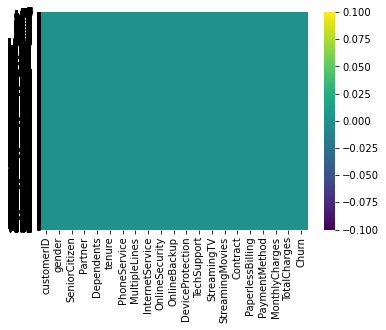

In [18]:
#sns.heatmap(df.isnull(),yticklabels=True,cmap="viridis")

### Q-6: Fill the NaN values if required

In [9]:
df_new.isnull().sum()#No any null values

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df_new.shape

(7043, 20)

In [11]:
# null=df_new[df_new["TotalCharges"]==' ']
# null

### Q-7: Find unique values in all the columns

In [12]:
df_new.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [13]:
columns=[ 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
for i in columns:
    print(i,":",df_new[i].unique())

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2

In [14]:
def funx(x):
    if(x == 'Yes'):
        return 1
    return 0
no_col=['Partner', 'Dependents','PaperlessBilling','Churn',"PhoneService"]
for i in no_col:
    df_new[i] =df_new[i].apply(funx)
    


In [15]:
df_new.head(20)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
5,Female,0,0,0,8,1,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,99.65,820.50,1
6,Male,0,0,1,22,1,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,1,Credit card (automatic),89.10,1949.40,0
7,Female,0,0,0,10,0,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,0,Mailed check,29.75,301.90,0
8,Female,0,1,0,28,1,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,1,Electronic check,104.80,3046.05,1
9,Male,0,0,1,62,1,No,DSL,Yes,Yes,No,No,No,No,One year,0,Bank transfer (automatic),56.15,3487.95,0


### Q-9: How many customer took tech support and show on pie chart

In [16]:
df_new.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [17]:
df_new["TechSupport"].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

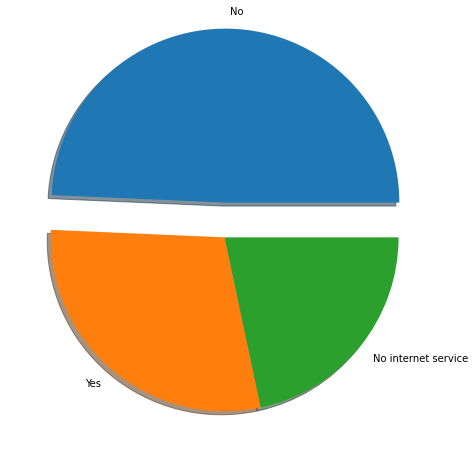

In [18]:
plt.figure(figsize=(10,8))
plt.pie(df_new["TechSupport"].value_counts(),labels=["No","Yes","No internet service"],explode=[0.2,0,0],shadow=True)
plt.show()

### Q-10 Plot the churned customer and non-churned customer

In [19]:
df_new["Churn"].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

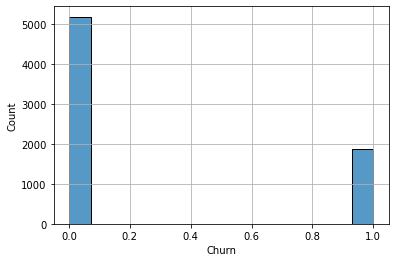

In [20]:
sns.histplot(df_new["Churn"])
plt.grid()

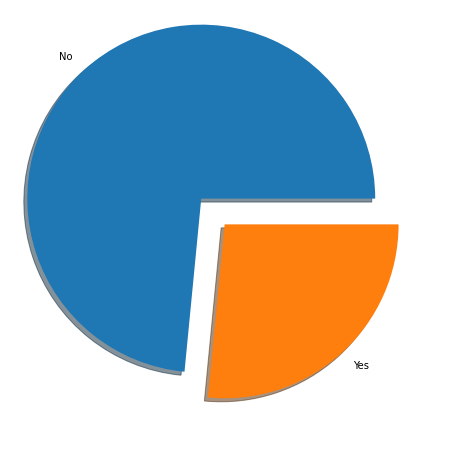

In [21]:
plt.figure(figsize=(10,8))
plt.pie(df_new["Churn"].value_counts(),labels=["No","Yes"],explode=[0.2,0],shadow=True)
plt.show()

### Q-11 Convert String values to Numeric values

In [22]:
df_new.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [23]:
df_new.dtypes

gender               object
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [24]:
df_new.tail()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,Male,0,1,1,24,1,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0
7039,Female,0,1,1,72,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.90,0
7040,Female,0,1,1,11,0,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,Male,1,1,0,4,1,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.60,1
7042,Male,0,0,0,66,1,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,1,Bank transfer (automatic),105.65,6844.50,0


In [234]:
remain_columns=[ 'gender','InternetService','Contract',
       'PaymentMethod']
for i in remain_columns:
    print(i,":",df_new[i].unique())

gender : ['Female' 'Male']
InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [25]:
df_new1=pd.get_dummies(df_new[['gender','InternetService','Contract',
       'PaymentMethod','MultipleLines','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies',]])
df_new1.head()

,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,1,0,1,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,0,1,1,0,0,0,1,0,0,0,...,1,1,0,0,1,0,0,1,0,0
2,0,1,1,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
3,0,1,1,0,0,0,1,0,1,0,...,1,0,0,1,1,0,0,1,0,0
4,1,0,0,1,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


In [26]:
df_new1=pd.concat([df_new,df_new1],axis=1)
df_new1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,Female,0,1,0,1,0,No phone service,DSL,No,Yes,...,0,1,0,0,1,0,0,1,0,0
1,Male,0,0,0,34,1,No,DSL,Yes,No,...,1,1,0,0,1,0,0,1,0,0
2,Male,0,0,0,2,1,No,DSL,Yes,Yes,...,0,1,0,0,1,0,0,1,0,0
3,Male,0,0,0,45,0,No phone service,DSL,Yes,No,...,1,0,0,1,1,0,0,1,0,0
4,Female,0,0,0,2,1,No,Fiber optic,No,No,...,0,1,0,0,1,0,0,1,0,0


In [27]:
df_new1=df_new1.drop(['gender','InternetService','Contract',
       'PaymentMethod','MultipleLines','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies',],axis=1)
df_new1.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Female,...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,0,1,0,1,0,1,29.85,29.85,0,1,...,0,1,0,0,1,0,0,1,0,0
1,0,0,0,34,1,0,56.95,1889.50,0,0,...,1,1,0,0,1,0,0,1,0,0
2,0,0,0,2,1,1,53.85,108.15,1,0,...,0,1,0,0,1,0,0,1,0,0
3,0,0,0,45,0,0,42.30,1840.75,0,0,...,1,0,0,1,1,0,0,1,0,0
4,0,0,0,2,1,1,70.70,151.65,1,1,...,0,1,0,0,1,0,0,1,0,0


### Q-12: Split the features and Target values

In [28]:
x=df_new1.drop(["Churn"],axis=1)#Features
y=df_new1["Churn"]#Target

In [29]:
x.shape

(7043, 41)

In [30]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

### Q-13: Data Splitting into training and testing dataset with 80:20 Ratio

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=25)

In [32]:
x_train.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender_Female,gender_Male,...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
6099,0,1,1,71,1,0,24.7,1810.55,1,0,...,0,0,1,0,0,1,0,0,1,0
1377,0,1,1,72,1,0,82.3,5815.15,0,1,...,1,0,0,1,0,0,1,1,0,0
6716,0,1,0,3,1,1,74.1,228.00,1,0,...,0,1,0,0,1,0,0,1,0,0
4411,0,1,0,57,0,1,49.9,2782.40,1,0,...,1,0,0,1,1,0,0,0,0,1
2984,0,1,0,26,1,0,26.0,684.05,1,0,...,0,0,1,0,0,1,0,0,1,0


In [33]:
y_train.head()

6099    0
1377    0
6716    1
4411    0
2984    0
Name: Churn, dtype: int64

In [34]:
x_test.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender_Female,gender_Male,...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
4864,0,1,0,71,1,1,113.15,7953.25,0,1,...,1,0,0,1,0,0,1,0,0,1
5033,0,0,0,1,1,1,19.40,19.40,1,0,...,0,0,1,0,0,1,0,0,1,0
2671,0,0,0,63,1,0,105.40,6713.20,0,1,...,0,0,0,1,0,0,1,0,0,1
3919,0,0,0,6,1,1,93.55,536.40,1,0,...,0,1,0,0,0,0,1,0,0,1
3630,0,0,0,4,1,0,20.95,85.50,1,0,...,0,0,1,0,0,1,0,0,1,0


In [35]:
y_test.value_counts()

0    1026
1     383
Name: Churn, dtype: int64

### Q-14: Apply feature Scaling into training dataset

In [36]:
x_train.loc[:,['tenure','MonthlyCharges',"TotalCharges"]]

,tenure,MonthlyCharges,TotalCharges
6099,71,24.70,1810.55
1377,72,82.30,5815.15
6716,3,74.10,228.00
4411,57,49.90,2782.40
2984,26,26.00,684.05
...,...,...,...
2934,12,19.40,198.10
2191,1,91.30,91.30
6618,26,86.65,2208.75
318,24,93.15,2231.05


In [37]:
from sklearn.preprocessing import StandardScaler

scale=StandardScaler()
x_train.loc[:,['tenure','MonthlyCharges',"TotalCharges"]]=scale.fit_transform(x_train.loc[:,['tenure','MonthlyCharges',"TotalCharges"]])
x_test.loc[:,['tenure','MonthlyCharges',"TotalCharges"]] = scale.transform(x_test.loc[:,['tenure','MonthlyCharges',"TotalCharges"]])



In [38]:
x_test.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender_Female,gender_Male,...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
4864,0,1,0,1.575836,1,1,1.606920,2.505402,0,1,...,1,0,0,1,0,0,1,0,0,1
5033,0,0,0,-1.273792,1,1,-1.505650,-0.996043,1,0,...,0,0,1,0,0,1,0,0,1,0
2671,0,0,0,1.250164,1,0,1.349614,1.958131,0,1,...,0,0,0,1,0,0,1,0,0,1
3919,0,0,0,-1.070247,1,1,0.956186,-0.767875,1,0,...,0,1,0,0,0,0,1,0,0,1
3630,0,0,0,-1.151665,1,0,-1.454189,-0.966871,1,0,...,0,0,1,0,0,1,0,0,1,0


In [39]:
x_train.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender_Female,gender_Male,...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
6099,0,1,1,1.575836,1,0,-1.329686,-0.205555,1,0,...,0,0,1,0,0,1,0,0,1,0
1377,0,1,1,1.616545,1,0,0.582677,1.561795,0,1,...,1,0,0,1,0,0,1,1,0,0
6716,0,1,0,-1.192374,1,1,0.310431,-0.903981,1,0,...,0,1,0,0,1,0,0,1,0,0
4411,0,1,0,1.005910,0,1,-0.493027,0.223352,1,0,...,1,0,0,1,1,0,0,0,0,1
2984,0,1,0,-0.256068,1,0,-1.286525,-0.702713,1,0,...,0,0,1,0,0,1,0,0,1,0


### Logistic regression

In [40]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [41]:
#Now predict the test set
y_pred_lr_test=classifier.predict(x_test)
#Predicting the train set
y_pred_lr_train=classifier.predict(x_train)


In [76]:
print("This is the accuracy of testing dataset when applying logistic reg. is ", np.round(accuracy_score(y_test,y_pred_lr_test),decimals=4))#Testing accuracy



This is the accuracy of testing dataset when applying logistic reg. is  0.8062


In [77]:
print("This is the accuracy of training dataset when applying logistic reg. is ", np.round(accuracy_score(y_train,y_pred_lr_train),decimals=4))#training accuracy


This is the accuracy of training dataset when applying logistic reg. is  0.8044


### SVM

In [44]:
from sklearn.svm import SVC
classifier1= SVC(kernel="rbf",random_state=0)
classifier1.fit(x_train,y_train)



SVC(random_state=0)

In [45]:
#Now predict the test set
y_pred_svm_test=classifier1.predict(x_test)
#Predicting the train set
y_pred_svm_train=classifier1.predict(x_train)


In [78]:
print("This is the accuracy of testing dataset when applying logistic reg. is ", np.round(accuracy_score(y_test,y_pred_svm_test),decimals=4))#Testing accuracy


This is the accuracy of testing dataset when applying logistic reg. is  0.7977


In [79]:
print("This is the accuracy of training dataset when applying logistic reg. is ", np.round(accuracy_score(y_train,y_pred_svm_train),decimals=4))#training accuracy


This is the accuracy of training dataset when applying logistic reg. is  0.8163


### DECISION TREE

In [48]:
from sklearn.tree import DecisionTreeClassifier
classifier2= DecisionTreeClassifier(criterion="entropy",random_state=0)
classifier2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [49]:
#Now predict the test set
y_pred_dt_test=classifier2.predict(x_test)
#Predicting the train set
y_pred_dt_train=classifier2.predict(x_train)


In [80]:
print("This is the accuracy of testing dataset when applying logistic reg. is ", np.round(accuracy_score(y_test,y_pred_dt_test),decimals=4))#Testing accuracy


This is the accuracy of testing dataset when applying logistic reg. is  0.7317


In [81]:
print("This is the accuracy of training dataset when applying logistic reg. is ", np.round(accuracy_score(y_train,y_pred_dt_train),decimals=4))#training accuracy


This is the accuracy of training dataset when applying logistic reg. is  0.9986


### RANDOM FOREST

In [52]:
from sklearn.ensemble import RandomForestClassifier
classifier3= RandomForestClassifier(criterion="entropy",random_state=0)
classifier3.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [53]:
#Now predict the test set
y_pred_rf_test=classifier3.predict(x_test)
#Predicting the train set
y_pred_rf_train=classifier3.predict(x_train)


In [83]:
print("This is the accuracy of testing dataset when applying logistic reg. is ", np.round(accuracy_score(y_test,y_pred_rf_test),decimals=4))#Testing accuracy


This is the accuracy of testing dataset when applying logistic reg. is  0.785


In [82]:
print("This is the accuracy of training dataset when applying logistic reg. is ", np.round(accuracy_score(y_train,y_pred_rf_train),decimals=4))#training accuracy


This is the accuracy of training dataset when applying logistic reg. is  0.9986


### NAIVE'S BAYES

In [56]:
from sklearn.naive_bayes import GaussianNB
classifier4= GaussianNB()
classifier4.fit(x_train,y_train)

GaussianNB()

In [57]:
#Now predict the test set
y_pred_nb_test=classifier4.predict(x_test)
#Predicting the train set
y_pred_nb_train=classifier4.predict(x_train)


In [84]:
print("This is the accuracy of testing dataset when applying logistic reg. is ", np.round(accuracy_score(y_test,y_pred_nb_test),decimals=4))#Testing accuracy


This is the accuracy of testing dataset when applying logistic reg. is  0.7026


In [85]:
print("This is the accuracy of training dataset when applying logistic reg. is ", np.round(accuracy_score(y_train,y_pred_nb_train),decimals=4))#training accuracy


This is the accuracy of training dataset when applying logistic reg. is  0.6878


### K-NN

In [60]:
from sklearn.neighbors import KNeighborsClassifier
classifier5= KNeighborsClassifier()
classifier5.fit(x_train,y_train)

KNeighborsClassifier()

In [61]:
#Now predict the test set
y_pred_knn_test=classifier5.predict(x_test)
#Predicting the train set
y_pred_knn_train=classifier5.predict(x_train)


In [86]:
print("This is the accuracy of testing dataset when applying logistic reg. is ", np.round(accuracy_score(y_test,y_pred_knn_test),decimals=4))#Testing accuracy


This is the accuracy of testing dataset when applying logistic reg. is  0.7729


In [87]:
print("This is the accuracy of training dataset when applying logistic reg. is ", np.round(accuracy_score(y_train,y_pred_knn_train),decimals=4))#training accuracy


This is the accuracy of training dataset when applying logistic reg. is  0.8387


### GRADIENT  BOOSTING

In [64]:
from sklearn.ensemble import GradientBoostingClassifier
classifier6= GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1,random_state=0)
classifier6.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [65]:
#Now predict the test set
y_pred_GB_test=classifier6.predict(x_test)
#Predicting the train set
y_pred_GB_train=classifier6.predict(x_train)


In [88]:
print("This is the accuracy of testing dataset when applying logistic reg. is ", np.round(accuracy_score(y_test,y_pred_GB_test),decimals=4))#Testing accuracy


This is the accuracy of testing dataset when applying logistic reg. is  0.7949


In [89]:
print("This is the accuracy of training dataset when applying logistic reg. is ", np.round(accuracy_score(y_train,y_pred_GB_train),decimals=4))#training accuracy


This is the accuracy of training dataset when applying logistic reg. is  0.814


### ADABOOST

In [68]:
from sklearn.ensemble import AdaBoostClassifier
classifier7= AdaBoostClassifier(n_estimators=100,random_state=0)
classifier7.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [69]:
#Now predict the test set
y_pred_ab_test=classifier7.predict(x_test)
#Predicting the train set
y_pred_ab_train=classifier7.predict(x_train)


In [90]:
print("This is the accuracy of testing dataset when applying logistic reg. is ", np.round(accuracy_score(y_test,y_pred_ab_test),decimals=4))#Testing accuracy


This is the accuracy of testing dataset when applying logistic reg. is  0.7999


In [91]:
print("This is the accuracy of training dataset when applying logistic reg. is ", np.round(accuracy_score(y_train,y_pred_ab_train),decimals=4))#training accuracy


This is the accuracy of training dataset when applying logistic reg. is  0.811


### BAGGING

In [110]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
classifier8= BaggingClassifier(base_estimator=GaussianNB
                               (),n_estimators=10,random_state=0)
classifier8.fit(x_train,y_train)

BaggingClassifier(base_estimator=GaussianNB(), random_state=0)

In [111]:
#Now predict the test set
y_pred_bag_test=classifier8.predict(x_test)
#Predicting the train set
y_pred_bag_train=classifier8.predict(x_train)


In [112]:
print("This is the accuracy of testing dataset when applying logistic reg. is ", np.round(accuracy_score(y_test,y_pred_bag_test),decimals=4))#Testing accuracy


This is the accuracy of testing dataset when applying logistic reg. is  0.7033


In [113]:
print("This is the accuracy of training dataset when applying logistic reg. is ", np.round(accuracy_score(y_train,y_pred_bag_train),decimals=4))#training accuracy


This is the accuracy of training dataset when applying logistic reg. is  0.6897


In [94]:
accuracy_table=pd.DataFrame({"MODEL":["LG","SVM","DT","RF","NB","KNN","GB","AB","BAG"],
                             "Training_accuracy":[0.8044,0.8163,0.9986,0.9986,0.6878,0.8387,0.814,0.811,0.6897],
                            "Test_accuracy":[0.8062,0.7977,0.7317,0.785,0.7026,0.7729,0.7949,0.7999,0.7033]})
accuracy_table

,MODEL,Training_accuracy,Test_accuracy
0,LG,0.8044,0.8062
1,SVM,0.8163,0.7977
2,DT,0.9986,0.7317
3,RF,0.9986,0.7850
4,NB,0.6878,0.7026
5,KNN,0.8387,0.7729
6,GB,0.8140,0.7949
7,AB,0.8110,0.7999
8,BAG,0.6897,0.7033


In [95]:
sort_accuracy_table=accuracy_table.sort_values(by="Test_accuracy",axis=0)
sort_accuracy_table#Summarizing the accuracy

,MODEL,Training_accuracy,Test_accuracy
4,NB,0.6878,0.7026
8,BAG,0.6897,0.7033
2,DT,0.9986,0.7317
5,KNN,0.8387,0.7729
3,RF,0.9986,0.7850
6,GB,0.8140,0.7949
1,SVM,0.8163,0.7977
7,AB,0.8110,0.7999
0,LG,0.8044,0.8062


### Q-16: Analyse the model accuracy

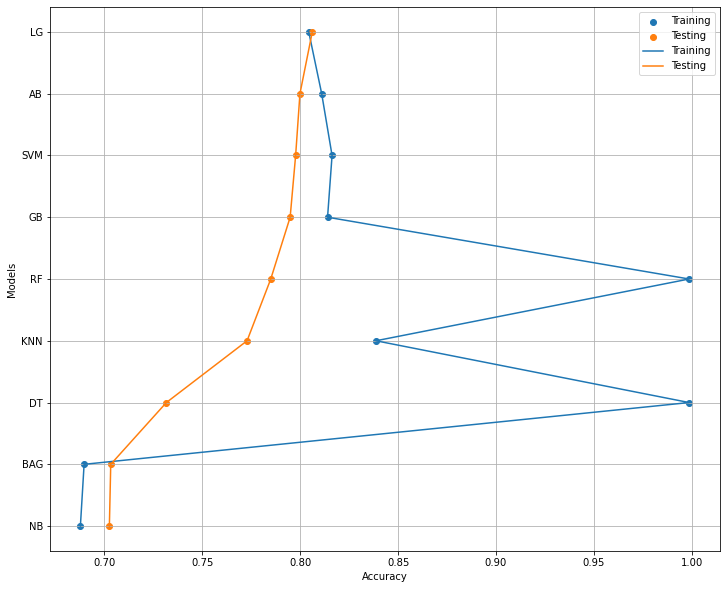

In [97]:
plt.figure(figsize=(12,10))
plt.scatter(sort_accuracy_table["Training_accuracy"],sort_accuracy_table["MODEL"],label="Training")
plt.scatter(sort_accuracy_table["Test_accuracy"],sort_accuracy_table["MODEL"],label="Testing")
plt.plot(sort_accuracy_table["Training_accuracy"],sort_accuracy_table["MODEL"],label="Training")
plt.plot(sort_accuracy_table["Test_accuracy"],sort_accuracy_table["MODEL"],label="Testing")
plt.xlabel("Accuracy")
plt.ylabel("Models")
plt.grid()
plt.legend()

## In the above graph we see logistic regression gives the better result with respect to the other models

### Q-17: Model validation

In [98]:
from sklearn.metrics import roc_curve,auc

In [102]:
confusion_matrix(y_test,y_pred_lr_test)

array([[932,  94],
       [179, 204]], dtype=int64)

In [99]:
fpr,tpr,thresh = roc_curve(y_test,y_pred_lr_test)

In [100]:
a = auc(fpr,tpr)

In [105]:
a

0.7205095709974094

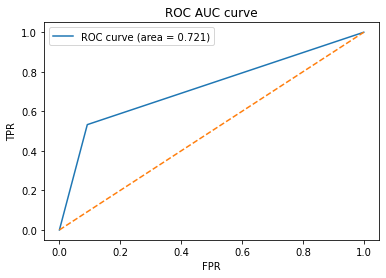

In [101]:
plt.plot(fpr,tpr,label='ROC curve (area = %0.3f)' % a)
plt.plot([0,1],[0,1],"--")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC AUC curve")
plt.show()

### Now here we see "HIGH TPR" but "LOW FPR " so this is a good classifier

## Now we have to find the overall significance of the model using G statistics and wald statistics

In [114]:
import statsmodels.api as sm

In [119]:
x_train.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender_Female,gender_Male,...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
6099,0,1,1,1.575836,1,0,-1.329686,-0.205555,1,0,...,0,0,1,0,0,1,0,0,1,0
1377,0,1,1,1.616545,1,0,0.582677,1.561795,0,1,...,1,0,0,1,0,0,1,1,0,0
6716,0,1,0,-1.192374,1,1,0.310431,-0.903981,1,0,...,0,1,0,0,1,0,0,1,0,0
4411,0,1,0,1.005910,0,1,-0.493027,0.223352,1,0,...,1,0,0,1,1,0,0,0,0,1
2984,0,1,0,-0.256068,1,0,-1.286525,-0.702713,1,0,...,0,0,1,0,0,1,0,0,1,0


In [120]:
x1=sm.add_constant(x_train)
logit_model=sm.Logit(y_train,x1)
result1=logit_model.fit()
print(result1.summary())

         Current function value: 0.416577
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 5634
Model:                          Logit   Df Residuals:                     5610
Method:                           MLE   Df Model:                           23
Date:                Sun, 17 Jul 2022   Pseudo R-squ.:                  0.2780
Time:                        11:12:28   Log-Likelihood:                -2347.0
converged:                      False   LL-Null:                       -3250.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.4580        nan        nan        nan   

C:\Users\shiwam\Anaconda_shi\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [125]:
len(x_train.columns)

41

In [123]:
G_value=2*(-2347.0-(-3250.5))
G_value

1807.0

In [127]:
from scipy.stats import chi2
chi2.pdf(G_value,41)#Here is the overall model significance p value 

0.0

In [128]:
#since p value < alpha, so we reject the null hypothesis and conclude that overall model is significant

### Q-19: Summarize the accuracy


### Q-20 Conclusion